#***1. Import the required libraries***

In [43]:
import numpy as np
import pandas as pd
import warnings
import math
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.stats import variation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

#***2. Read and understand the data***

In [45]:
data = pd.read_excel('imf-dm-export-20230513.xlsx')
data.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5


In [46]:
# Check the shape of the data
data.shape

(231, 50)

In [47]:
# Check the overall info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Real GDP growth (Annual percent change)  229 non-null    object
 1   1980                                     228 non-null    object
 2   1981                                     228 non-null    object
 3   1982                                     228 non-null    object
 4   1983                                     228 non-null    object
 5   1984                                     228 non-null    object
 6   1985                                     228 non-null    object
 7   1986                                     228 non-null    object
 8   1987                                     228 non-null    object
 9   1988                                     228 non-null    object
 10  1989                                     228 non-null    objec

In [48]:
# Check the numerical data stats
data.describe()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
count,229,228,228,228,228,228,228,228,228,228,...,228,228.0,228.0,228,228.0,228,228,228,228,228
unique,229,115,104,104,103,105,102,100,108,110,...,98,131.0,119.0,104,76.0,68,63,65,61,57
top,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-1.8,5.7,4,3.5,2,3,3,3,3
freq,1,59,55,54,54,54,54,53,52,51,...,8,8.0,7.0,9,10.0,9,13,14,17,15


#***3. Exploratory Data Analysis***

##***3.1 Missing values***

In [49]:
data.isnull().sum() # Check for null values

Real GDP growth (Annual percent change)    2
1980                                       3
1981                                       3
1982                                       3
1983                                       3
1984                                       3
1985                                       3
1986                                       3
1987                                       3
1988                                       3
1989                                       3
1990                                       3
1991                                       3
1992                                       3
1993                                       3
1994                                       3
1995                                       3
1996                                       3
1997                                       3
1998                                       3
1999                                       3
2000                                       3
2001      

***Inference: There are missing values in the data.***

In [50]:
# Performing dataframe cleaning
data.rename(columns={'Real GDP growth (Annual percent change)': 'Country'}, inplace=True) # Renaming column 'Real GDP growth (Annual percent change)' to 'Country'
dataset = data.drop([0,229 ,230]) # Delete lines 0, 229 and 230
indice_remover = 196 # Initial index of the line we want to revolve
dataset = dataset.drop(dataset.index[indice_remover:]) # Removing the lines from the index
dataset.isnull().sum(axis=0) # Check the amount of null data

Country    0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
2026       0
2027       0
2028       0
dtype: int64

***Inference: There are no missing values in the data.***


In [51]:
dataset.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
5,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,-0.7,-5.6,1.1,2.8,3.5,3.7,4,4.1,4.2,4.2


In [52]:
dataset.dtypes # Check the column type

Country    object
1980       object
1981       object
1982       object
1983       object
1984       object
1985       object
1986       object
1987       object
1988       object
1989       object
1990       object
1991       object
1992       object
1993       object
1994       object
1995       object
1996       object
1997       object
1998       object
1999       object
2000       object
2001       object
2002       object
2003       object
2004       object
2005       object
2006       object
2007       object
2008       object
2009       object
2010       object
2011       object
2012       object
2013       object
2014       object
2015       object
2016       object
2017       object
2018       object
2019       object
2020       object
2021       object
2022       object
2023       object
2024       object
2025       object
2026       object
2027       object
2028       object
dtype: object

***Inference: There are string values ​​in the data.***




In [53]:
dataset = dataset.replace('no data' , np.nan) # Modifying the data 'no data' to Not a Number
dataset.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,-2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1.0,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
5,Angola,2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,6.1,...,-0.7,-5.6,1.1,2.8,3.5,3.7,4.0,4.1,4.2,4.2


In [54]:
dataset.dtypes # Check the column type

Country     object
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
2026       float64
2027       float64
2028       float64
dtype: object

***Inference: There are no missing values in the data.***

In [55]:
# Creating 'Continet' column
Continent = {
    "Algeria": "Africa",
    "Angola": "Africa",
    "Benin": "Africa",
    "Botswana": "Africa",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cabo Verde": "Africa",
    "Cameroon": "Africa",
    "Chad": "Africa",
    "Comoros": "Africa",
    "Congo (Brazzaville)": "Africa",
    "Congo (Kinshasa)": "Africa",
    "Djibouti": "Africa",
    "Egypt": "Africa",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Ghana": "Africa",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Ivory Coast": "Africa",
    "Kenya": "Africa",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Mali": "Africa",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Namibia": "Africa",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "Rwanda": "Africa",
    "Sao Tome and Principe": "Africa",
    "Senegal": "Africa",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Sudan": "Africa",
    "Sudan": "Africa",
    "Tanzania": "Africa",
    "Togo": "Africa",
    "Tunisia": "Africa",
    "Uganda": "Africa",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "Afghanistan": "Asia",
    "Armenia": "Asia",
    "Azerbaijan": "Asia",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Bhutan": "Asia",
    "Brunei": "Asia",
    "Cambodia": "Asia",
    "China": "Asia",
    "Cyprus": "Asia",
    "Georgia": "Asia",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Israel": "Asia",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Lebanon": "Asia",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mongolia": "Asia",
    "Myanmar (Burma)": "Asia",
    "Nepal": "Asia",
    "North Korea": "Asia",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palestine": "Asia",
    "Philippines": "Asia",
    "Qatar": "Asia",
    "Saudi Arabia": "Asia",
    "Singapore": "Asia",
    "South Korea": "Asia",
    "Sri Lanka": "Asia",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Thailand": "Asia",
    "Timor-Leste": "Asia",
    "Turkey": "Asia",
    "Turkmenistan": "Asia",
    "United Arab Emirates": "Asia",
    "Uzbekistan": "Asia",
    "Vietnam": "Asia",
    "Yemen": "Asia",
    "Antigua and Barbuda": "America",
    "Argentina": "America",
    "Aruba" : "America",
    "Bahamas": "America",
    "Barbados": "America",
    "Belize": "America",
    "Bolivia": "America",
    "Brazil": "America",
    "Canada": "America",
    "Chile": "America",
    "Colombia": "America",
    "Costa Rica": "America",
    "Cuba": "America",
    "Dominica": "America",
    "Dominican Republic": "America",
    "Ecuador": "America",
    "El Salvador": "America",
    "Grenada": "America",
    "Guatemala": "America",
    "Guyana": "America",
    "Haiti": "America",
    "Honduras": "America",
    "Jamaica": "America",
    "Mexico": "America",
    "Nicaragua": "America",
    "Panama": "America",
    "Paraguay": "America",
    "Peru": "America",
    "Saint Kitts and Nevis": "America",
    "Saint Lucia": "America",
    "Saint Vincent and the Grenadines": "America",
    "Suriname": "America",
    "Trinidad and Tobago": "America",
    "United States of America": "America",
    "Uruguay": "America",
    "Venezuela": "America",
    "Albania": "Europe",
    "Andorra": "Europe",
    "Austria": "Europe",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Bosnia and Herzegovina": "Europe",
    "Bulgaria": "Europe",
    "Croatia": "Europe",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Estonia": "Europe",
    "Finland": "Europe",
    "France": "Europe",
    "Germany": "Europe",
    "Greece": "Europe",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "Ireland": "Europe",
    "Italy": "Europe",
    "Kosovo": "Europe",
    "Latvia": "Europe",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Malta": "Europe",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Montenegro": "Europe",
    "Netherlands": "Europe",
    "North Macedonia ": "Europe",
    "Norway": "Europe",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Romania": "Europe",
    "Russia": "Europe",
    "San Marino": "Europe",
    "Serbia": "Europe",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Spain": "Europe",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Ukraine": "Europe",
    "United Kingdom": "Europe",
    "Vatican City": "Europe",
    "Australia": "Oceania",
    "Fiji": "Oceania",
    "Kiribati": "Oceania",
    "Marshall Islands": "Oceania",
    "Oceania": "Oceania",
    "Nauru": "Oceania",
    "New Zealand": "Oceania",
    "Palau": "Oceania",
    "Papua New Guinea": "Oceania",
    "Samoa": "Oceania",
    "Solomon Islands": "Oceania",
    "Tonga": "Oceania",
    "Tuvalu": "Oceania",
    "Vanuatu": "Oceania",
    "Aruba": "America",
    "Bahamas, The": "America",
    "Brunei Darussalam": "Asia",
    "China, República Popular do": "Asia",
    "Congo, Dem. Rep. do": "Africa",
    "Congo, República da": "Africa",
    "Côte d'Ivoire": "Africa",
    "Gâmbia": "Africa",
    "Hong Kong SAR": "Asia",
    "Coreia, República do": "Asia",
    "República do Quirguistão": "Asia",
    "Lao PDR": "Asia",
    "Macau SAR": "Asia",
    "Micronesia, Fed. States of": "Oceania",
    "Mianmar": "Asia",
    "Macedônia do Norte": "Europe",
    "Porto Rico": "America",
    "Federação Russa": "Asia",
    "Eslováquia": "Europe",
    "Sudão do Sul, República de": "Africa",
    "São Tomé e Príncipe": "Africa",
    "Taiwan Província da China": "Asia",
    "Türkiye, República da": "Asia",
    "Cisjordânia e Gaza": "Asia",
    "China, People's Republic of": "Asia",
    "Congo, Dem. Rep. of the": "Africa",
    "Congo, Republic of": "Africa",
    "Gambia, The": "Africa",
    "Korea, Republic of": "Africa",
    "Kyrgyz Republic": "Asia",
    "Lao P.D.R.": "Asia",
    "Macao SAR": "Asia",
    "Oceania, Fed. States of": "Oceania",
    "Myanmar" : "Asia",
    "Puerto Rico": "America",
    "Russian Federation": "Asia",
    "Slovak Republic": "Europe",
    "South Sudan, Republic of": "Africa",
    "São Tomé and Príncipe": "Africa",
    "Taiwan Province of China": "Asia",
    "Türkiye, Republic of": "Asia",
    "United States": "America",
    "West Bank and Gaza": "Asia",
    "Congo, Republic of " : "Africa",
    "Côte d'Ivoire": "Africa",
    "Central African Republic": "Africa",
}

dataset['Continent'] = dataset['Country'].map(Continent) # Assigning continents to countries

In [56]:
cols = dataset.columns.tolist() # Get list of columns
cols = ['Continent'] + cols[:-1] # Move the 'continents' column to the first position
dataset = dataset[cols]

In [57]:
# Function to fill NaN values with the continent's mean
def fill_with_continent_mean(column):
    for idx, value in column.iteritems():
        if pd.isnull(value):
            # Get the continent for the current index
            current_continent = dataset.at[idx, 'Continent']
            # Calculate the continent's mean for the current year
            continent_mean = dataset[dataset['Continent'] == current_continent][year_col].mean()
            # Fill the NaN value with the continent's mean for the year
            filled_value = continent_mean
            column[idx] = filled_value  # Update the value in the column

    return column

# Iterate over the year columns to fill NaN values with the continent's mean for each year
for year_col in dataset.columns[2:]:  # Starting from the third column (the years)
    dataset[year_col] = fill_with_continent_mean(dataset[year_col])

# Display the DataFrame after filling
dataset


,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Asia,Afghanistan,3.976667,5.651613,2.435484,4.764516,7.161290,3.738710,3.650000,5.390625,...,3.9,-2.4,5.206522,3.919565,4.565217,4.154348,3.991304,3.83913,3.763043,3.745652
2,Europe,Albania,2.700000,5.700000,2.900000,1.100000,2.000000,-1.500000,5.600000,-0.800000,...,2.1,-3.5,8.500000,3.700000,2.200000,3.300000,3.400000,3.40000,3.400000,3.400000
3,Africa,Algeria,-5.400000,3.000000,6.400000,5.400000,5.600000,5.600000,-0.200000,-0.700000,...,1.0,-5.1,3.400000,2.900000,2.600000,2.600000,2.200000,2.10000,1.700000,1.800000
4,Europe,Andorra,2.887500,1.088000,1.473077,2.084615,3.011538,2.530769,3.338462,3.176923,...,2.0,-11.2,8.900000,8.700000,1.300000,1.500000,1.500000,1.50000,1.500000,1.500000
5,Africa,Angola,2.400000,-4.400000,0.000000,4.200000,6.000000,3.500000,2.900000,4.100000,...,-0.7,-5.6,1.100000,2.800000,3.500000,3.700000,4.000000,4.10000,4.200000,4.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Asia,Vietnam,-3.500000,5.800000,8.200000,7.100000,8.400000,5.600000,3.400000,2.500000,...,7.4,2.9,2.600000,8.000000,5.800000,6.900000,6.800000,6.70000,6.700000,6.700000
193,Asia,West Bank and Gaza,3.976667,5.651613,2.435484,4.764516,7.161290,3.738710,3.650000,5.390625,...,1.4,-11.3,7.000000,4.000000,3.500000,2.700000,2.400000,2.00000,2.000000,2.000000
194,Asia,Yemen,3.976667,5.651613,2.435484,4.764516,7.161290,3.738710,3.650000,5.390625,...,1.4,-8.5,-1.000000,1.500000,-0.500000,2.000000,7.000000,6.50000,6.000000,5.500000
195,Africa,Zambia,3.900000,6.600000,-2.900000,-1.100000,-1.700000,1.200000,1.700000,1.500000,...,1.4,-2.8,4.600000,3.400000,4.000000,4.100000,4.600000,4.70000,5.000000,5.100000


In [58]:
dataset.isnull().sum()# Check the amount of null data

Continent    0
Country      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
2021         0
2022         0
2023         0
2024         0
2025         0
2026         0
2027         0
2028         0
dtype: int64

##***3.2 Pivot table***

***We create a Pivot Table to show the data by Date***

In [59]:
dataset_filled_copy = dataset.copy() # Creating a copy of the dataset
pivoted_df = pd.melt(dataset_filled_copy, id_vars=['Continent', 'Country'], var_name='Year', value_name='GDP') # Pivoting the dataset
pivoted_df['GDP'] = pivoted_df['GDP'].round(2)# Round the values ​​in column 'Value' to 2 decimal places

pivoted_df.head() # Display the new pivoted DataFrame

,Continent,Country,Year,GDP
0,Asia,Afghanistan,1980,3.98
1,Europe,Albania,1980,2.70
2,Africa,Algeria,1980,-5.40
3,Europe,Andorra,1980,2.89
4,Africa,Angola,1980,2.40


##***3.3 Outliers***

In [60]:
pivoted_df.describe(percentiles=[.25,.5,.75])

,GDP
count,9604.000000
mean,3.332031
std,5.824023
min,-54.200000
25%,1.500000
50%,3.410000
75%,5.500000
max,148.000000


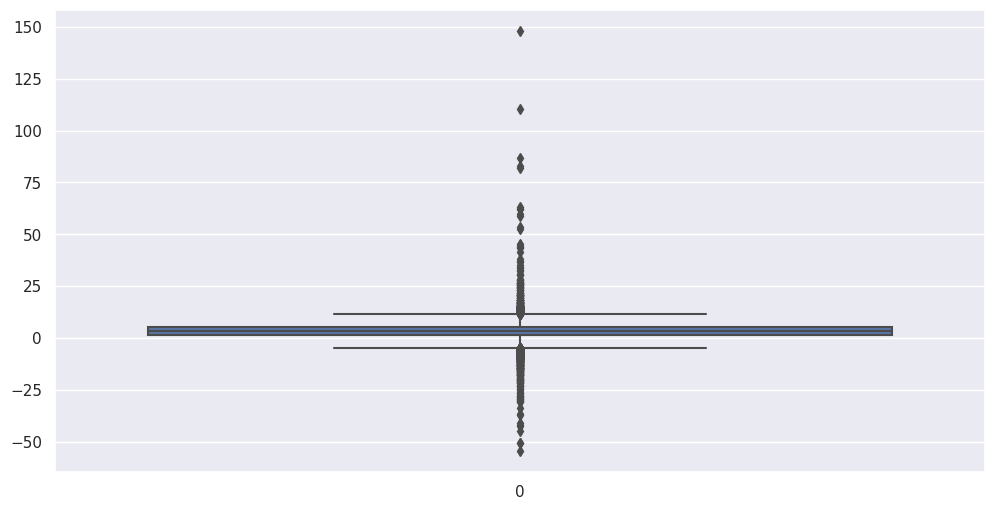

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(pivoted_df['GDP'])
plt.show()

***Inference: We can clearly see that there are outliers in the data.***

***We will keep the outliers as they are. We cannot delete them as this is a time series data and deleting any data point will lead to discontinuity in the data.***

#***4. Data Preparation***

In [62]:
data = dataset.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 196
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Continent  196 non-null    object 
 1   Country    196 non-null    object 
 2   1980       196 non-null    float64
 3   1981       196 non-null    float64
 4   1982       196 non-null    float64
 5   1983       196 non-null    float64
 6   1984       196 non-null    float64
 7   1985       196 non-null    float64
 8   1986       196 non-null    float64
 9   1987       196 non-null    float64
 10  1988       196 non-null    float64
 11  1989       196 non-null    float64
 12  1990       196 non-null    float64
 13  1991       196 non-null    float64
 14  1992       196 non-null    float64
 15  1993       196 non-null    float64
 16  1994       196 non-null    float64
 17  1995       196 non-null    float64
 18  1996       196 non-null    float64
 19  1997       196 non-null    float64
 20  1998      

In [63]:
data.head() # Check the dataset

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Asia,Afghanistan,3.976667,5.651613,2.435484,4.764516,7.161290,3.738710,3.650000,5.390625,...,3.9,-2.4,5.206522,3.919565,4.565217,4.154348,3.991304,3.83913,3.763043,3.745652
2,Europe,Albania,2.700000,5.700000,2.900000,1.100000,2.000000,-1.500000,5.600000,-0.800000,...,2.1,-3.5,8.500000,3.700000,2.200000,3.300000,3.400000,3.40000,3.400000,3.400000
3,Africa,Algeria,-5.400000,3.000000,6.400000,5.400000,5.600000,5.600000,-0.200000,-0.700000,...,1.0,-5.1,3.400000,2.900000,2.600000,2.600000,2.200000,2.10000,1.700000,1.800000
4,Europe,Andorra,2.887500,1.088000,1.473077,2.084615,3.011538,2.530769,3.338462,3.176923,...,2.0,-11.2,8.900000,8.700000,1.300000,1.500000,1.500000,1.50000,1.500000,1.500000
5,Africa,Angola,2.400000,-4.400000,0.000000,4.200000,6.000000,3.500000,2.900000,4.100000,...,-0.7,-5.6,1.100000,2.800000,3.500000,3.700000,4.000000,4.10000,4.200000,4.200000


#***5. Displaying dataframe graphics***

In [64]:
data_graphics = pivoted_df.copy()
data_graphics.describe()

,GDP
count,9604.000000
mean,3.332031
std,5.824023
min,-54.200000
25%,1.500000
50%,3.410000
75%,5.500000
max,148.000000


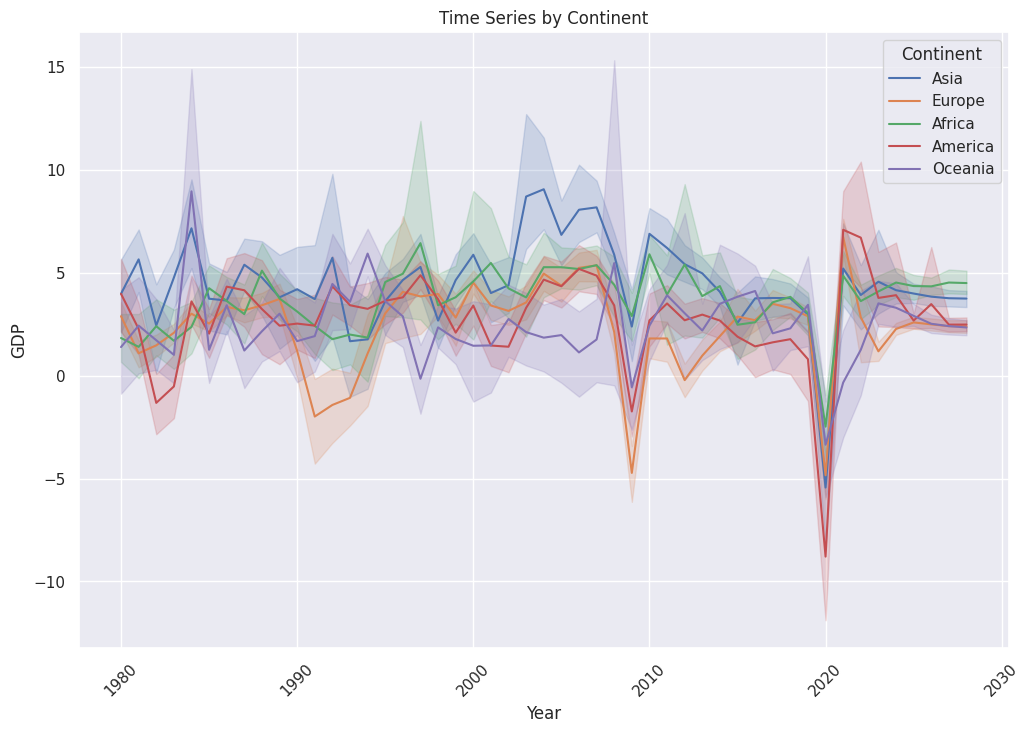

In [65]:
# Set the graphic style
sns.set(style="darkgrid")

# Create a time series plot by continent
plt.figure(figsize=(12, 8))
sns.lineplot(data=data_graphics, x='Year', y='GDP', hue='Continent', alpha=1)
plt.title('Time Series by Continent')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.legend(title='Continent')
plt.show()

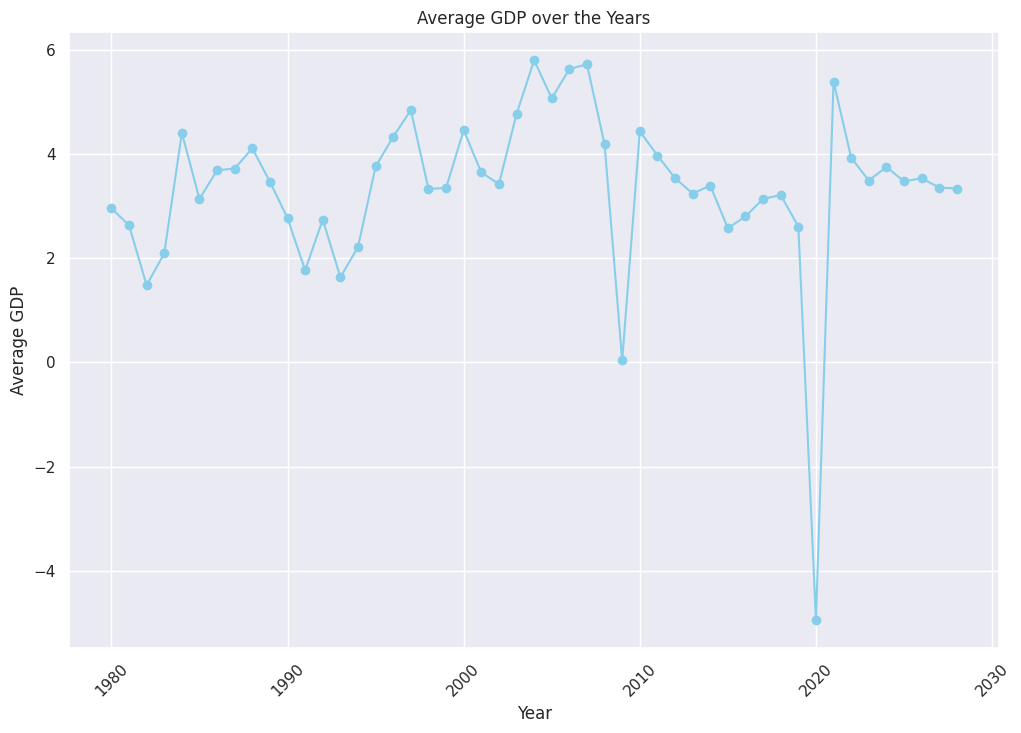

In [66]:
# Average GDP over the Years
plt.figure(figsize=(12, 8))
df_grouped = data_graphics.groupby('Year')['GDP'].mean()
df_grouped.plot(kind='line', marker='o', color='skyblue')
plt.title('Average GDP over the Years')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.xticks(rotation=45)
plt.show()

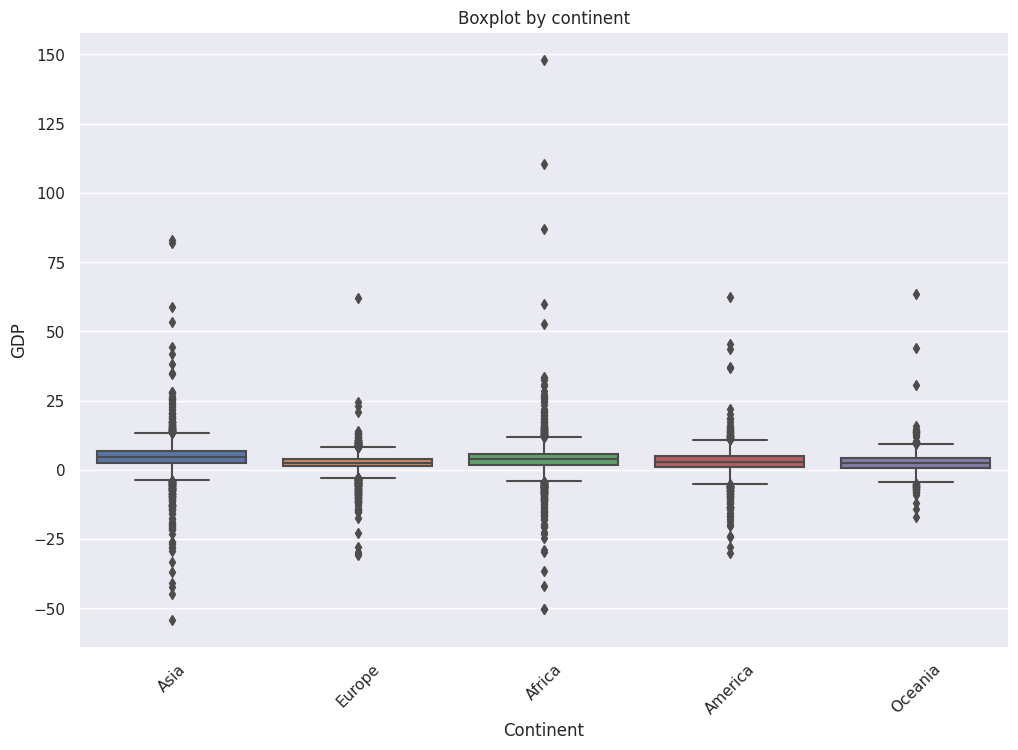

In [67]:
# Configure the graphics style
sns.set(style="darkgrid")

# Create boxplots separated by continent
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_graphics, x='Continent', y='GDP')
plt.title('Boxplot by continent')
plt.xlabel('Continent')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Continent Average
mean_by_continent = data_graphics.groupby('Continent')['GDP'].mean()
mean_by_continent

Continent
Africa     3.705302
America    2.743866
Asia       4.466306
Europe     2.322454
Oceania    2.436808
Name: GDP, dtype: float64

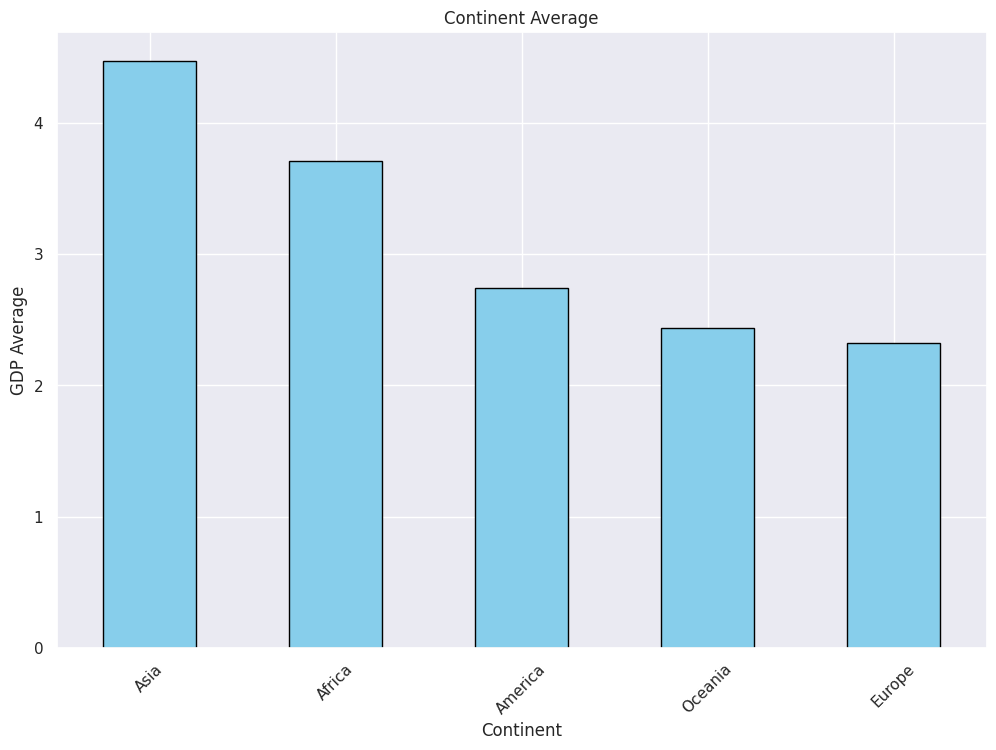

In [69]:
# Bar Graph for the Average by Continent
plt.figure(figsize=(12, 8))
mean_by_continent = data_graphics.groupby('Continent')['GDP'].mean()
mean_by_continent.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Continent Average')
plt.xlabel('Continent')
plt.ylabel('GDP Average')
plt.xticks(rotation=45)
plt.show()

In [70]:
# Standard deviation by continent
std_by_continent = data_graphics.groupby('Continent')['GDP'].std()

print(std_by_continent)

Continent
Africa     6.683742
America    5.076269
Asia       6.534997
Europe     4.121510
Oceania    4.801191
Name: GDP, dtype: float64


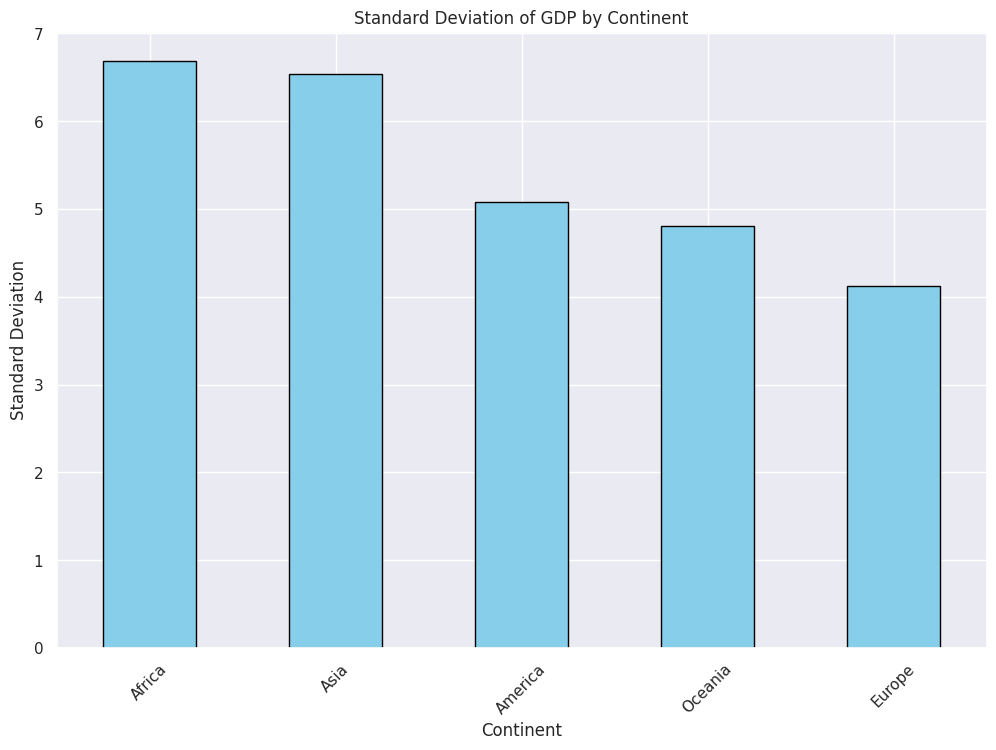

In [71]:
# Calculate the standard deviation by continent
std_by_continent = data_graphics.groupby('Continent')['GDP'].std()

# Create a bar chart
plt.figure(figsize=(12, 8))
std_by_continent.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Standard Deviation of GDP by Continent')
plt.xlabel('Continent')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [72]:
# Min by Continent
min_by_continent = data_graphics.groupby('Continent')['GDP'].min()

print(min_by_continent)

Continent
Africa    -50.3
America   -30.0
Asia      -54.2
Europe    -30.9
Oceania   -17.0
Name: GDP, dtype: float64


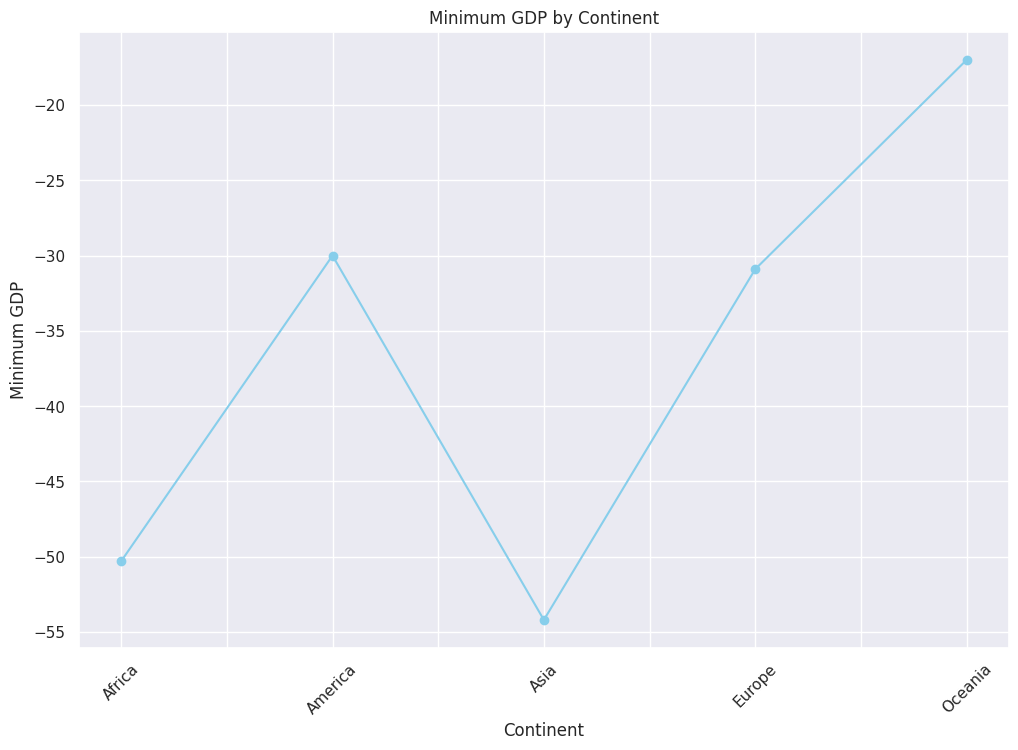

In [73]:
# Calculate the minimum GDP by continent
min_by_continent = data_graphics.groupby('Continent')['GDP'].min()

# Create a bar chart
plt.figure(figsize=(12, 8))
min_by_continent.plot(kind='line', marker='o', color='skyblue')

plt.title('Minimum GDP by Continent')
plt.xlabel('Continent')
plt.ylabel('Minimum GDP')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [74]:
# Max by Continent
max_by_continent = data_graphics.groupby('Continent')['GDP'].max()

print(max_by_continent)

Continent
Africa     148.0
America     62.3
Asia        82.8
Europe      62.2
Oceania     63.3
Name: GDP, dtype: float64


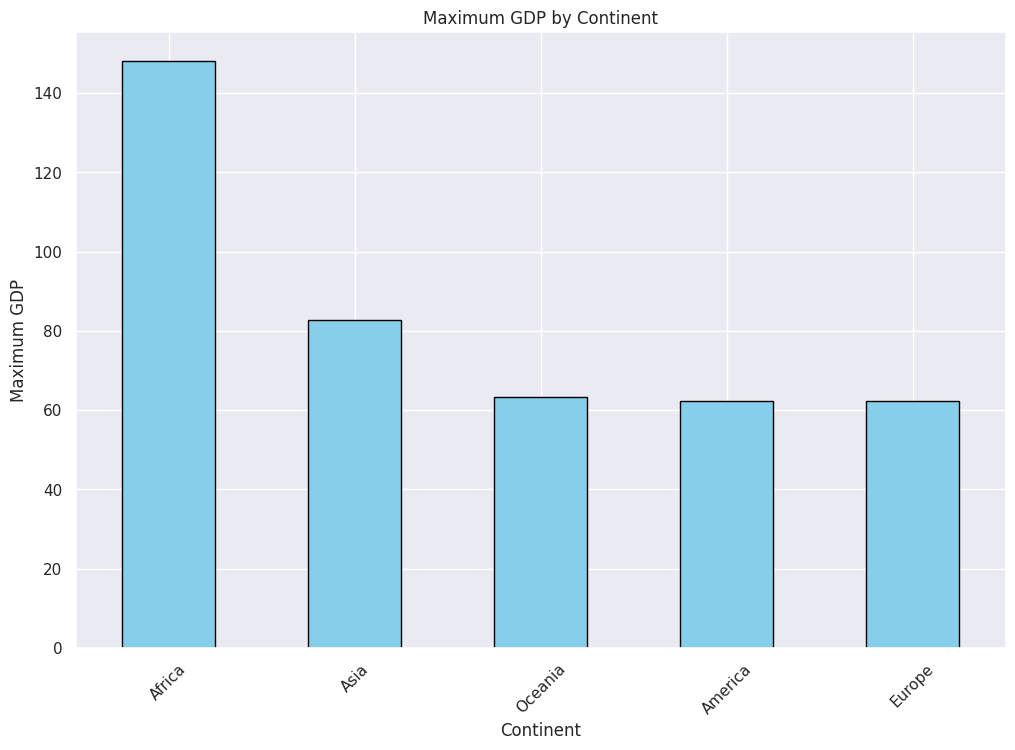

In [75]:
# Calculate the maximum GDP by continent
max_by_continent = data_graphics.groupby('Continent')['GDP'].max()

# Create a bar chart
plt.figure(figsize=(12, 8))
max_by_continent.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Maximum GDP by Continent')
plt.xlabel('Continent')
plt.ylabel('Maximum GDP')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [76]:
# Quartiles by Continent
quartiles_by_continent = data_graphics.groupby('Continent')['GDP'].quantile([0.25, 0.5, 0.75])

print(quartiles_by_continent)

Continent      
Africa     0.25    1.80
           0.50    3.80
           0.75    5.80
America    0.25    0.90
           0.50    3.00
           0.75    4.90
Asia       0.25    2.60
           0.50    4.60
           0.75    6.90
Europe     0.25    1.20
           0.50    2.60
           0.75    3.97
Oceania    0.25    0.60
           0.50    2.30
           0.75    4.10
Name: GDP, dtype: float64


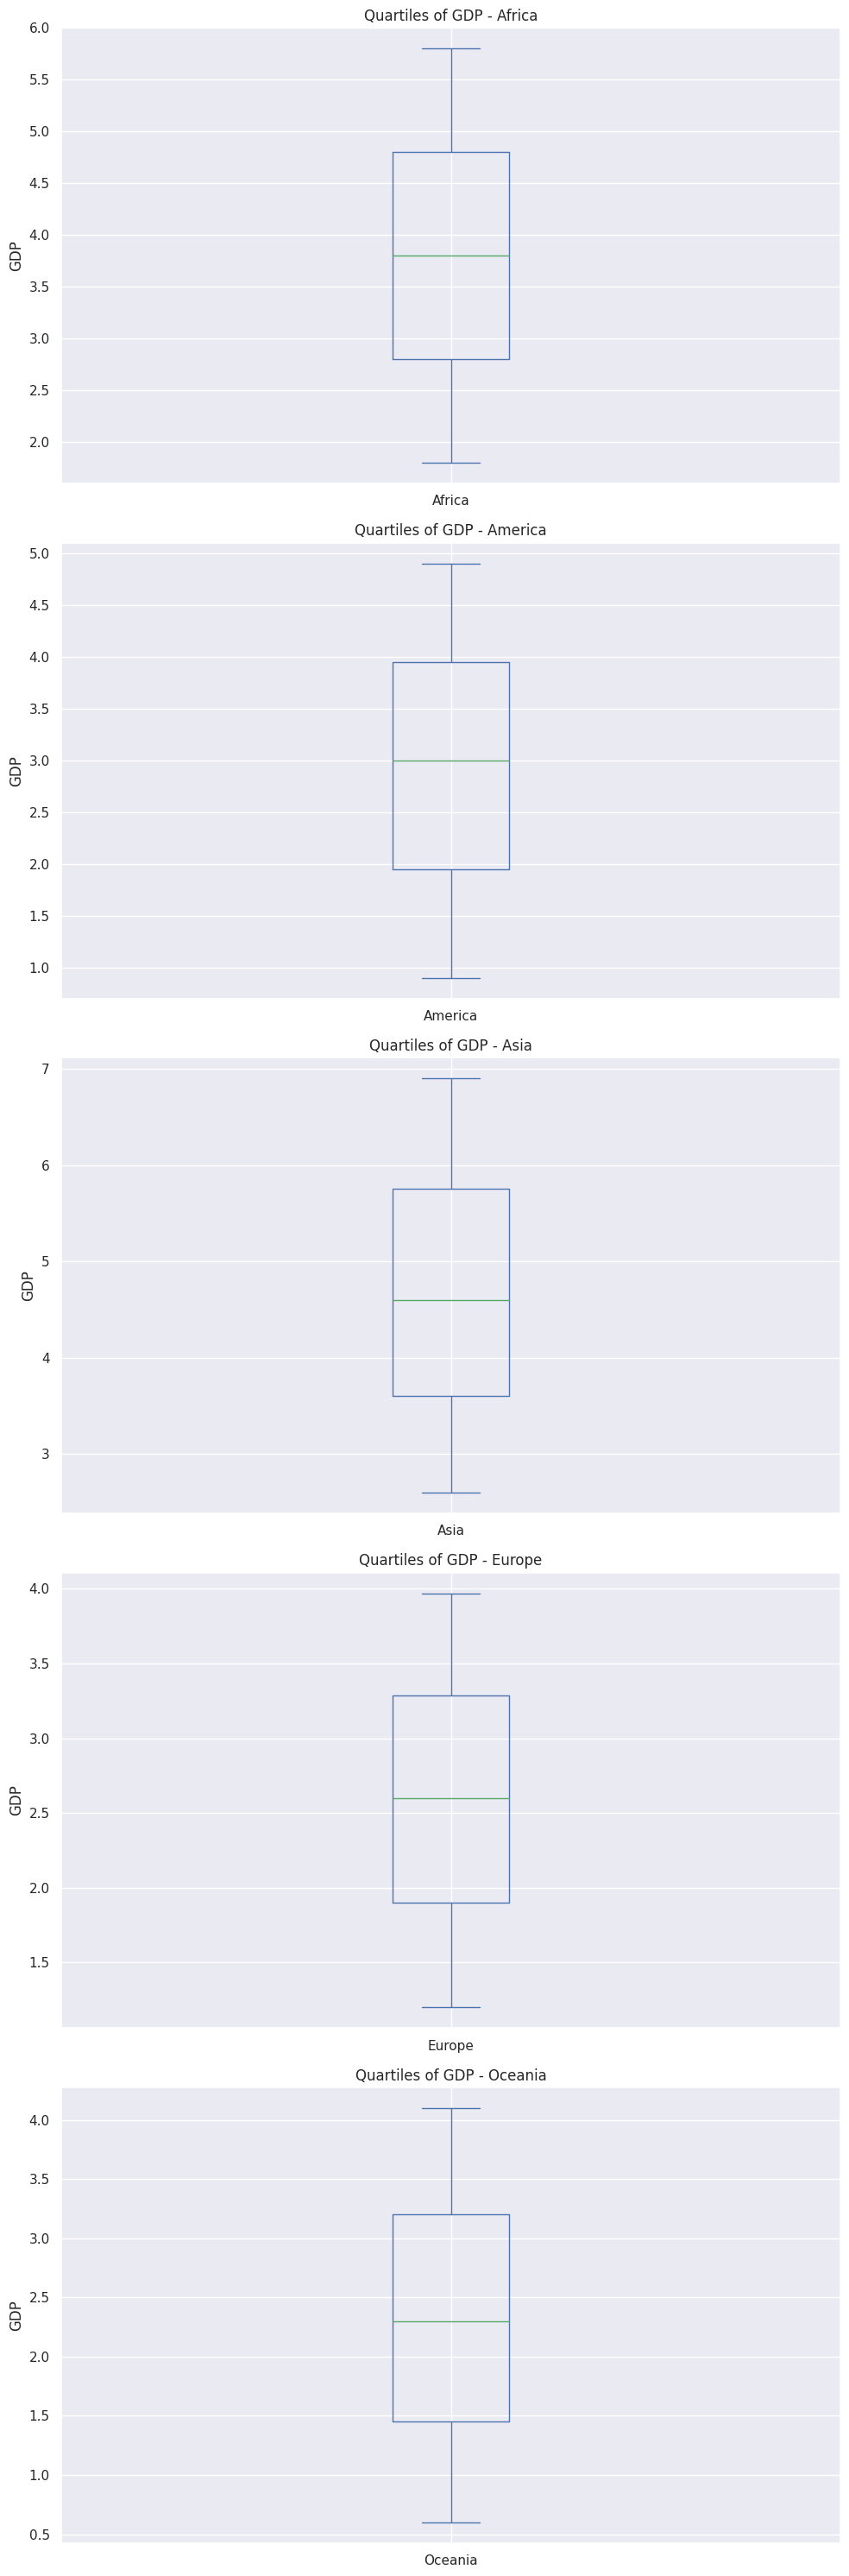

In [77]:
# Calculate quartiles by continent
quartiles_by_continent = data_graphics.groupby('Continent')['GDP'].quantile([0.25, 0.5, 0.75]).unstack()

# Create individual box plots for each continent
fig, axes = plt.subplots(nrows=len(quartiles_by_continent), figsize=(10, 6 * len(quartiles_by_continent)))
for i, (continent, quartiles) in enumerate(quartiles_by_continent.iterrows()):
    ax = axes[i]
    quartiles.plot(kind='box', ax=ax)
    ax.set_title(f'Quartiles of GDP - {continent}')
    ax.set_ylabel('GDP')
    ax.grid(True)

plt.tight_layout()
plt.show()

#***6. Modeling***

##***Dataframe used***

In [78]:
dataset

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Asia,Afghanistan,3.976667,5.651613,2.435484,4.764516,7.161290,3.738710,3.650000,5.390625,...,3.9,-2.4,5.206522,3.919565,4.565217,4.154348,3.991304,3.83913,3.763043,3.745652
2,Europe,Albania,2.700000,5.700000,2.900000,1.100000,2.000000,-1.500000,5.600000,-0.800000,...,2.1,-3.5,8.500000,3.700000,2.200000,3.300000,3.400000,3.40000,3.400000,3.400000
3,Africa,Algeria,-5.400000,3.000000,6.400000,5.400000,5.600000,5.600000,-0.200000,-0.700000,...,1.0,-5.1,3.400000,2.900000,2.600000,2.600000,2.200000,2.10000,1.700000,1.800000
4,Europe,Andorra,2.887500,1.088000,1.473077,2.084615,3.011538,2.530769,3.338462,3.176923,...,2.0,-11.2,8.900000,8.700000,1.300000,1.500000,1.500000,1.50000,1.500000,1.500000
5,Africa,Angola,2.400000,-4.400000,0.000000,4.200000,6.000000,3.500000,2.900000,4.100000,...,-0.7,-5.6,1.100000,2.800000,3.500000,3.700000,4.000000,4.10000,4.200000,4.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Asia,Vietnam,-3.500000,5.800000,8.200000,7.100000,8.400000,5.600000,3.400000,2.500000,...,7.4,2.9,2.600000,8.000000,5.800000,6.900000,6.800000,6.70000,6.700000,6.700000
193,Asia,West Bank and Gaza,3.976667,5.651613,2.435484,4.764516,7.161290,3.738710,3.650000,5.390625,...,1.4,-11.3,7.000000,4.000000,3.500000,2.700000,2.400000,2.00000,2.000000,2.000000
194,Asia,Yemen,3.976667,5.651613,2.435484,4.764516,7.161290,3.738710,3.650000,5.390625,...,1.4,-8.5,-1.000000,1.500000,-0.500000,2.000000,7.000000,6.50000,6.000000,5.500000
195,Africa,Zambia,3.900000,6.600000,-2.900000,-1.100000,-1.700000,1.200000,1.700000,1.500000,...,1.4,-2.8,4.600000,3.400000,4.000000,4.100000,4.600000,4.70000,5.000000,5.100000


##***Applying XGBoost***

In [79]:
data_xgbregressor = dataset.copy()

# Define the training columns (1980 to 2023) and target columns (2024 to 2028)
cols_train = [str(year) for year in range(1980, 2029)] # Including 2028
cols_target = [str(year) for year in range(2024, 2029)]

# Convert column indices to strings
data_xgbregressor.columns = data_xgbregressor.columns.astype(str)

# Split the dataset into features (X) and target columns (y)
X_train = data_xgbregressor.loc[:, cols_train[:-5]] # Excluding the last 5 years
y_train = data_xgbregressor.loc[:, cols_target]
X_test = data_xgbregressor.loc[:, cols_train[:-5]] # Excluding the last 5 years
y_test = data_xgbregressor.loc[:, cols_target]

# Create an XGBoost model with adjusted hyperparameters
model = XGBRegressor(
    learning_rate=0.1,
    n_estimators=55,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    objective='reg:squarederror',
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

# Create a DataFrame with predictions for each year
predictions_df = pd.DataFrame(predictions, columns=cols_target)
predictions_df['Country'] = data_xgbregressor['Country'].values # Add the 'Country' column
predictions_df['Continent'] = data_xgbregressor['Continent'].values # Add the 'Continent' column

# Rearrange columns
predictions_df = predictions_df[['Continent', 'Country'] + cols_target]

# Set the index to start from 1
predictions_df.index = predictions_df.index + 1

# Calculate the Mean Absolute Percentage Error (MAPE) for each country
mape_per_country = []

for i, row in y_test.iterrows():
    country = data_xgbregressor.loc[i, 'Country']
    actual = row.values
    predicted = predictions_df.loc[i, cols_target].values
    absolute_percentage_errors = abs((actual - predicted) / actual) * 100
    mape_per_country.append({'Country': country, 'MAPE': absolute_percentage_errors.mean()})

# Create a DataFrame with MAPE for each country
mape_df = pd.DataFrame(mape_per_country)

# Calculate the overall Mean Absolute Percentage Error (MAPE) average
overall_mape_average_xgboost = mape_df['MAPE'].mean()

# Merge the MAPE DataFrame with the predictions DataFrame based on 'Country'
predictions_df = pd.merge(predictions_df, mape_df, on='Country')

# Set the index to start from 1
predictions_df.index = predictions_df.index + 1

# Calculate the Mean Squared Error (MSE) for each country
rmse_per_country = []

for i, row in y_test.iterrows():
    country = data_xgbregressor.loc[i, 'Country']
    actual = row.values
    predicted = predictions_df.loc[i, cols_target].values
    mse = mean_squared_error(actual, predicted)
    rmse = mse ** 0.5
    rmse_per_country.append({'Country': country, 'RMSE': rmse})

# Create a DataFrame with MSE for each country
rmse_df = pd.DataFrame(rmse_per_country)

# Calculate the overall Root Mean Squared Error (RMSE) average
overall_rmse_average_xgboost = rmse_df['RMSE'].mean()

# Merge the RMSE DataFrame with the predictions DataFrame based on 'Country'
predictions_xgboost = pd.merge(predictions_df, rmse_df, on='Country')

# Display the DataFrame with predictions, MAPE, and MSE for each country
print("Predicted Model XGBoost:")
# Display the overall MAPE average
print("Overall MAPE Average:", overall_mape_average_xgboost)
# Display the overall RMSE average
print("Overall RMSE Average:", overall_rmse_average_xgboost)

predictions_xgboost


Predicted Model XGBoost:
Overall MAPE Average: 12.41246684809357
Overall RMSE Average: 0.3691798197906695


,Continent,Country,2024,2025,2026,2027,2028,MAPE,RMSE
0,Asia,Afghanistan,4.368815,4.206141,4.013719,3.723432,3.939804,4.265747,0.179942
1,Europe,Albania,2.934844,3.307093,3.212527,3.297359,3.277277,5.188039,0.201352
2,Africa,Algeria,2.658218,2.654462,2.311270,2.196606,2.269508,17.650579,0.379899
3,Europe,Andorra,1.866979,2.020952,1.970719,1.675696,1.756621,23.879558,0.380622
4,Africa,Angola,3.532128,3.592265,3.653922,3.907827,3.971767,7.600208,0.325844
...,...,...,...,...,...,...,...,...,...
191,Asia,Vietnam,6.402964,6.530025,6.374890,6.392061,6.206742,5.596837,0.390834
192,Asia,West Bank and Gaza,2.972189,2.778152,2.246619,2.149283,2.443681,13.563300,0.315292
193,Asia,Yemen,1.932456,5.715981,4.796985,4.819301,4.353291,17.689626,1.205199
194,Africa,Zambia,4.329679,4.428418,4.358209,4.541175,4.479460,7.589608,0.398649


##***Applying RandomForestRegressor***

In [80]:
# @title
data_rfregressor = dataset.copy()

# Define the training columns (1980 to 2023) and target columns (2024 to 2028)
cols_train = [str(year) for year in range(1980, 2029)] # Including 2028
cols_target = [str(year) for year in range(2024, 2029)]

# Convert column indices to strings
data_rfregressor.columns = data_rfregressor.columns.astype(str)

# Split the dataset into features (X) and target columns (y)
X_train = data_rfregressor.loc[:, cols_train[:-5]] # Excluding the last 5 years
y_train = data_rfregressor.loc[:, cols_target]
X_test = data_rfregressor.loc[:, cols_train[:-5]] # Excluding the last 5 years
y_test = data_rfregressor.loc[:, cols_target]

# Create a RandomForestRegressor model with adjusted hyperparameters
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

# Create a DataFrame with predictions for each year
predictions_df = pd.DataFrame(predictions, columns=cols_target)
predictions_df['Country'] = data_rfregressor['Country'].values # Add the 'Country' column
predictions_df['Continent'] = data_rfregressor['Continent'].values # Add the 'Continent' column

# Rearrange columns
predictions_df = predictions_df[['Continent', 'Country'] + cols_target]

# Set the index to start from 1
predictions_df.index = predictions_df.index + 1

# Calculate the Mean Absolute Percentage Error (MAPE) for each country
mape_per_country = []

for i, row in y_test.iterrows():
    country = data_rfregressor.loc[i, 'Country']
    actual = row.values
    predicted = predictions_df.loc[i, cols_target].values
    absolute_percentage_errors = abs((actual - predicted) / actual) * 100
    mape_per_country.append({'Country': country, 'MAPE': absolute_percentage_errors.mean()})

# Create a DataFrame with MAPE for each country
mape_df = pd.DataFrame(mape_per_country)

# Calculate the overall Mean Absolute Percentage Error (MAPE) average
overall_mape_average_randomforestregressor = mape_df['MAPE'].mean()

# Merge the MAPE DataFrame with the predictions DataFrame based on 'Country'
predictions_df = pd.merge(predictions_df, mape_df, on='Country')

# Set the index to start from 1
predictions_df.index = predictions_df.index + 1

# Calculate the Mean Squared Error (MSE) for each country
rmse_per_country = []

for i, row in y_test.iterrows():
    country = data_rfregressor.loc[i, 'Country']
    actual = row.values
    predicted = predictions_df.loc[i, cols_target].values
    mse = mean_squared_error(actual, predicted)
    rmse = mse ** 0.5
    rmse_per_country.append({'Country': country, 'RMSE': rmse})

# Create a DataFrame with RMSE for each country
rmse_df = pd.DataFrame(rmse_per_country)

# Calculate the overall Root Mean Squared Error (RMSE) average
overall_rmse_average_randomforestregressor = rmse_df['RMSE'].mean()

# Merge the RMSE DataFrame with the predictions DataFrame based on 'Country'
predictions_randomforestregressor = pd.merge(predictions_df, rmse_df, on='Country')

# Display the DataFrame with predictions, MAPE, and RMSE for each country
print("Predicted Model RandomForestRegressor:")
# Display the overall MAPE average
print("Overall MAPE Average:", overall_mape_average_randomforestregressor)
# Display the overall RMSE average
print("Overall RMSE Average:", overall_rmse_average_randomforestregressor)

predictions_randomforestregressor


Predicted Model RandomForestRegressor:
Overall MAPE Average: 11.765366159692093
Overall RMSE Average: 0.37667017709019346


,Continent,Country,2024,2025,2026,2027,2028,MAPE,RMSE
0,Asia,Afghanistan,4.269377,4.088378,3.957174,3.937873,3.915355,3.490475,0.138531
1,Europe,Albania,3.095207,3.181057,3.135291,3.134841,3.124178,7.268425,0.247521
2,Africa,Algeria,2.488160,2.416814,2.301339,2.116134,2.155986,13.599962,0.282824
3,Europe,Andorra,1.698594,1.870525,1.826912,1.773845,1.766453,19.151045,0.293117
4,Africa,Angola,3.706859,3.807059,3.803766,4.086970,4.057498,3.663640,0.177826
...,...,...,...,...,...,...,...,...,...
191,Asia,Vietnam,6.533725,6.526233,6.441475,6.376617,6.362067,4.612659,0.314553
192,Asia,West Bank and Gaza,3.305539,2.965718,2.647877,2.819755,2.776546,31.641564,0.690142
193,Asia,Yemen,2.056876,4.911673,4.568446,4.273462,3.992335,23.716199,1.633967
194,Africa,Zambia,4.251031,4.603701,4.602544,4.781574,4.804186,3.201296,0.183051


##***Applying LinearRegressor***

In [81]:
# @title
data_lrregressor = dataset.copy()

# Define the training columns (1980 to 2023) and target columns (2024 to 2028)
cols_train = [str(year) for year in range(1980, 2029)] # Including 2028
cols_target = [str(year) for year in range(2024, 2029)]

# Convert column indices to strings
data_lrregressor.columns = data_lrregressor.columns.astype(str)

# Split the dataset into features (X) and target columns (y)
X_train = data_lrregressor.loc[:, cols_train[:-5]] # Excluding the last 5 years
y_train = data_lrregressor.loc[:, cols_target]
X_test = data_lrregressor.loc[:, cols_train[:-5]] # Excluding the last 5 years
y_test = data_lrregressor.loc[:, cols_target]

# Create a LinearRegressor model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

# Create a DataFrame with predictions for each year
predictions_df = pd.DataFrame(predictions, columns=cols_target)
predictions_df['Country'] = data_lrregressor['Country'].values # Add the 'Country' column
predictions_df['Continent'] = data_lrregressor['Continent'].values # Add the 'Continent' column

# Rearrange columns
predictions_df = predictions_df[['Continent', 'Country'] + cols_target]

# Set the index to start from 1
predictions_df.index = predictions_df.index + 1

# Calculate the Mean Absolute Percentage Error (MAPE) for each country
mape_per_country = []

for i, row in y_test.iterrows():
    country = data_lrregressor.loc[i, 'Country']
    actual = row.values
    predicted = predictions_df.loc[i, cols_target].values
    absolute_percentage_errors = abs((actual - predicted) / actual) * 100
    mape_per_country.append({'Country': country, 'MAPE': absolute_percentage_errors.mean()})

# Create a DataFrame with MAPE for each country
mape_df = pd.DataFrame(mape_per_country)

# Calculate the overall Mean Absolute Percentage Error (MAPE) average
overall_mape_average_linearregression = mape_df['MAPE'].mean()

# Merge the MAPE DataFrame with the predictions DataFrame based on 'Country'
predictions_df = pd.merge(predictions_df, mape_df, on='Country')

# Set the index to start from 1
predictions_df.index = predictions_df.index + 1

# Calculate the Root Mean Squared Error (RMSE) for each country
rmse_per_country = []

for i, row in y_test.iterrows():
    country = data_lrregressor.loc[i, 'Country']
    actual = row.values
    predicted = predictions_df.loc[i, cols_target].values
    rmse = mean_squared_error(actual, predicted, squared=False)  # Calculate RMSE
    rmse_per_country.append({'Country': country, 'RMSE': rmse})

# Create a DataFrame with RMSE for each country
rmse_df = pd.DataFrame(rmse_per_country)

# Calculate the overall Root Mean Squared Error (RMSE) average
overall_rmse_average_linearregression = rmse_df['RMSE'].mean()

# Merge the RMSE DataFrame with the predictions DataFrame based on 'Country'
predictions_linearregression = pd.merge(predictions_df, rmse_df, on='Country')

# Display the DataFrame with predictions, MAPE, and RMSE for each country
print("Predicted Model LinearRegression:")
# Display the overall MAPE average
print("Overall MAPE Average:", overall_mape_average_linearregression)
# Display the overall RMSE average
print("Overall RMSE Average:", overall_rmse_average_linearregression)

predictions_linearregression


Predicted Model LinearRegression:
Overall MAPE Average: 32.82373094779107
Overall RMSE Average: 0.9387534461362849


,Continent,Country,2024,2025,2026,2027,2028,MAPE,RMSE
0,Asia,Afghanistan,3.953191,4.255563,4.625783,4.398497,4.374192,13.124108,0.552808
1,Europe,Albania,3.148005,3.954591,3.602511,3.932856,3.856457,11.194208,0.415685
2,Africa,Algeria,2.957338,3.218314,2.497692,2.794090,2.877085,40.632938,0.857899
3,Europe,Andorra,2.645809,2.108325,2.418821,2.100038,2.088764,51.490083,0.804221
4,Africa,Angola,3.514530,3.638932,3.733531,4.012042,3.897366,6.931684,0.291885
...,...,...,...,...,...,...,...,...,...
191,Asia,Vietnam,6.605012,5.322399,6.125087,5.175293,5.230052,15.856350,1.190490
192,Asia,West Bank and Gaza,2.321525,3.232378,2.287679,3.438050,3.407426,41.071543,0.996764
193,Asia,Yemen,0.740591,3.324634,3.347174,2.511006,2.460393,55.479234,3.047853
194,Africa,Zambia,5.454101,4.465909,5.151322,4.668417,4.744358,11.829900,0.677007


##***Applying ARIMA***

In [82]:
# @title
data_arima = dataset.copy()

# Define the forecasting period
forecast_years = range(2024, 2029)

# List of unique countries
countries = data_arima['Country'].unique()

# Function to fit the ARIMA model and make forecasts
def fit_arima_and_forecast(train_data, test_data, p, d, q):
    model = ARIMA(train_data, order=(p, d, q))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=len(test_data))

    return forecast

# DataFrame to store results in the correct format
results_formatted = []

# Loop through countries
for country in countries:
    country_data = data_arima[data_arima['Country'] == country]

    # Split data into training and testing
    train_data = country_data.iloc[:, 2:-len(forecast_years)]
    test_data = country_data.iloc[:, -len(forecast_years):]

    # Fit ARIMA model and make forecasts (replace p, d, and q with appropriate values)
    p, d, q = 1, 1, 1 # Replace these values with appropriate ones for each country
    forecast_values = []

    for i in range(len(test_data)):
        actual_values = test_data.iloc[i, :].values
        forecast = fit_arima_and_forecast(train_data.iloc[i, :], actual_values, p, d, q)
        forecast_values.append(forecast)

    forecast_values = np.array(forecast_values)

    # Calculate MAPE, MSE, and RMSE
    actual_values = test_data.values
    mape = (np.abs(actual_values - forecast_values) / actual_values).mean(axis=1) * 100
    mse = mean_squared_error(actual_values, forecast_values, multioutput='raw_values')
    rmse = np.sqrt(mse)

    # Add results in the correct format to the DataFrame
    result_row = {
        'Continent': country_data['Continent'].values[0],
        'Country': country,
        **{str(year): forecast for year, forecast in zip(forecast_years, forecast_values[0])},
        'MAPE': mape.tolist()[0], # Assume only one value for MAPE
        'MSE': mse.tolist()[0],   # Assume only one value for MSE
        'RMSE': rmse.tolist()[0]   # Assume only one value for RMSE
    }
    results_formatted.append(result_row)

# Create a DataFrame with results in the correct format
predictions_arima = pd.DataFrame(results_formatted)

# Calculate the overall Mean Absolute Percentage Error (MAPE) average
overall_mape_average_arima = results_df['MAPE'].mean()

# Calculate the overall Root Mean Squared Error (RMSE) average
overall_rmse_average_arima = results_df['RMSE'].mean()

print("Predicted Model ARIMA:")

# Display the overall MAPE average
print("Overall MAPE Average:", overall_mape_average_arima)
# Display the overall RMSE average
print("Overall RMSE Average:", overall_rmse_average_arima)

predictions_arima

Predicted Model ARIMA:
Overall MAPE Average: 37.00545187723458
Overall RMSE Average: 1.4837766360909104


,Continent,Country,2024,2025,2026,2027,2028,MAPE,MSE,RMSE
0,Asia,Afghanistan,3.706396,4.159392,3.920454,4.046484,3.980008,6.180259,0.200661,0.447952
1,Europe,Albania,2.609905,2.748277,2.794988,2.810756,2.816079,18.475927,0.476232,0.690095
2,Africa,Algeria,2.438276,2.378821,2.356963,2.348928,2.345973,19.017757,0.026155,0.161724
3,Europe,Andorra,1.697631,1.853433,1.914480,1.938400,1.947773,24.689566,0.039058,0.197631
4,Africa,Angola,2.645963,2.266203,2.097338,2.022249,1.988860,45.035046,1.110995,1.054037
...,...,...,...,...,...,...,...,...,...,...
191,Asia,Vietnam,3.530740,4.438902,4.075454,4.220906,4.162696,39.519164,11.351910,3.369260
192,Asia,West Bank and Gaza,4.012041,4.192827,4.256657,4.279193,4.287150,92.889046,1.721452,1.312041
193,Asia,Yemen,-1.834411,-2.008705,-2.031470,-2.034443,-2.034832,144.514810,14.702708,3.834411
194,Africa,Zambia,3.195851,3.153684,3.151473,3.151357,3.151351,32.324625,0.817485,0.904149


##***Applying SARIMA***

In [83]:
# @title
data_sarima = dataset.copy()

# Define the forecasting period
forecast_years = range(2024, 2029)

# List of unique countries
countries = data_sarima['Country'].unique()

# Function to fit the SARIMA model and make forecasts
def fit_sarima_and_forecast(train_data, test_data, p, d, q, P, D, Q, S):
    model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=len(test_data))

    return forecast

# DataFrame to store results in the correct format
results_formatted = []

# Loop through countries
for country in countries:
    country_data = data_sarima[data_sarima['Country'] == country]

    # Split data into training and testing
    train_data = country_data.iloc[:, 2:-len(forecast_years)]
    test_data = country_data.iloc[:, -len(forecast_years):]

    # Fit the SARIMA model and make forecasts (replace values of p, d, q, P, D, Q, S with appropriate values for each country)
    p, d, q, P, D, Q, S = 1, 1, 1, 1, 1, 1, 12 # Replace these values with appropriate ones for each country
    forecast_values = []

    for i in range(len(test_data)):
        actual_values = test_data.iloc[i, :].values
        forecast = fit_sarima_and_forecast(train_data.iloc[i, :], actual_values, p, d, q, P, D, Q, S)
        forecast_values.append(forecast)

    forecast_values = np.array(forecast_values)

    # Calculate MAPE, MSE, and RMSE
    actual_values = test_data.values
    mape = (np.abs(actual_values - forecast_values) / actual_values).mean(axis=1) * 100
    mse = mean_squared_error(actual_values, forecast_values, multioutput='raw_values')
    rmse = np.sqrt(mse)

    # Add results in the correct format to the DataFrame
    result_row = {
        'Continent': country_data['Continent'].values[0],
        'Country': country,
        **{str(year): forecast for year, forecast in zip(forecast_years, forecast_values[0])},
        'MAPE': mape.tolist()[0], # Assume only one value for MAPE
        'MSE': mse.tolist()[0],   # Assume only one value for MSE
        'RMSE': rmse.tolist()[0]   # Assume only one value for RMSE
    }
    results_formatted.append(result_row)

# Create a DataFrame with results in the correct format
predictions_sarima = pd.DataFrame(results_formatted)

# Calculate the overall Mean Absolute Percentage Error (MAPE) average
overall_mape_average_sarima = results_sarima_df['MAPE'].mean()

# Calculate the overall Root Mean Squared Error (RMSE) average
overall_rmse_average_sarima = results_sarima_df['RMSE'].mean()

print("Predicted Model SARIMA:")

# Display the overall MAPE average
print("Overall MAPE Average:", overall_mape_average_sarima)
# Display the overall RMSE average
print("Overall RMSE Average:", overall_rmse_average_sarima)

predictions_sarima

Predicted Model SARIMA:
Overall MAPE Average: 95.76414032442982
Overall RMSE Average: 3.2475168845248352


,Continent,Country,2024,2025,2026,2027,2028,MAPE,MSE,RMSE
0,Asia,Afghanistan,6.160391,2.626825,1.112749,1.545255,0.499080,59.820301,4.024210,2.006043
1,Europe,Albania,2.061075,5.511461,0.809911,-2.849424,3.808974,74.331859,1.534935,1.238925
2,Africa,Algeria,3.031704,2.770362,4.000774,4.326691,3.197144,73.034587,0.186369,0.431704
3,Europe,Andorra,-2.233772,-0.124677,2.991818,3.998054,5.345159,175.913068,13.941053,3.733772
4,Africa,Angola,3.860660,0.272897,2.046573,2.302065,3.788389,40.518503,0.025812,0.160660
...,...,...,...,...,...,...,...,...,...,...
191,Asia,Vietnam,4.499778,4.922855,5.663595,6.465581,6.273707,17.544201,5.761067,2.400222
192,Asia,West Bank and Gaza,-12.735608,-13.700387,-18.515562,7.522725,16.206548,650.956075,238.257999,15.435608
193,Asia,Yemen,0.584173,-0.063013,-3.193244,-19.340137,-8.000521,197.723603,2.004567,1.415827
194,Africa,Zambia,6.283451,1.542209,2.131481,2.123470,3.528604,52.544055,4.767459,2.183451


##***COPARANDO OS MODELOS E SEU TEMPO PARA RODAR***

##***Conclusions: Based on the analysis of the models, the RandomForestRegressor model was the one that presented the best results with the lowest MAPE index***